# Plotting class -playground

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Set up basics
import datajoint as dj 

In [3]:
# Load base schema
schema = dj.schema(dj.config['dj_imaging.database'])
schema.spawn_missing_classes()
imhotte = dj.schema('user_horsto_imaging')
imhotte.spawn_missing_classes()

Connecting horsto@kavlidatajoint02.it.ntnu.no:3306


In [4]:
# Make plots prettier
import seaborn as sns
sns.set(style='white')
%config InlineBackend.figure_format = 'retina'

In [5]:
from dj_plotter import dj_plotter

### Only tracking

In [75]:
some_paths = Recording * Tracking.OpenField & 'animal_name = "87245"' & FilteredRecordings  & OVC.proj(recording_name = "base_session")
len(some_paths)

5

Drawing path-event plots:   0%|          | 0/9 [00:00<?, ?it/s]

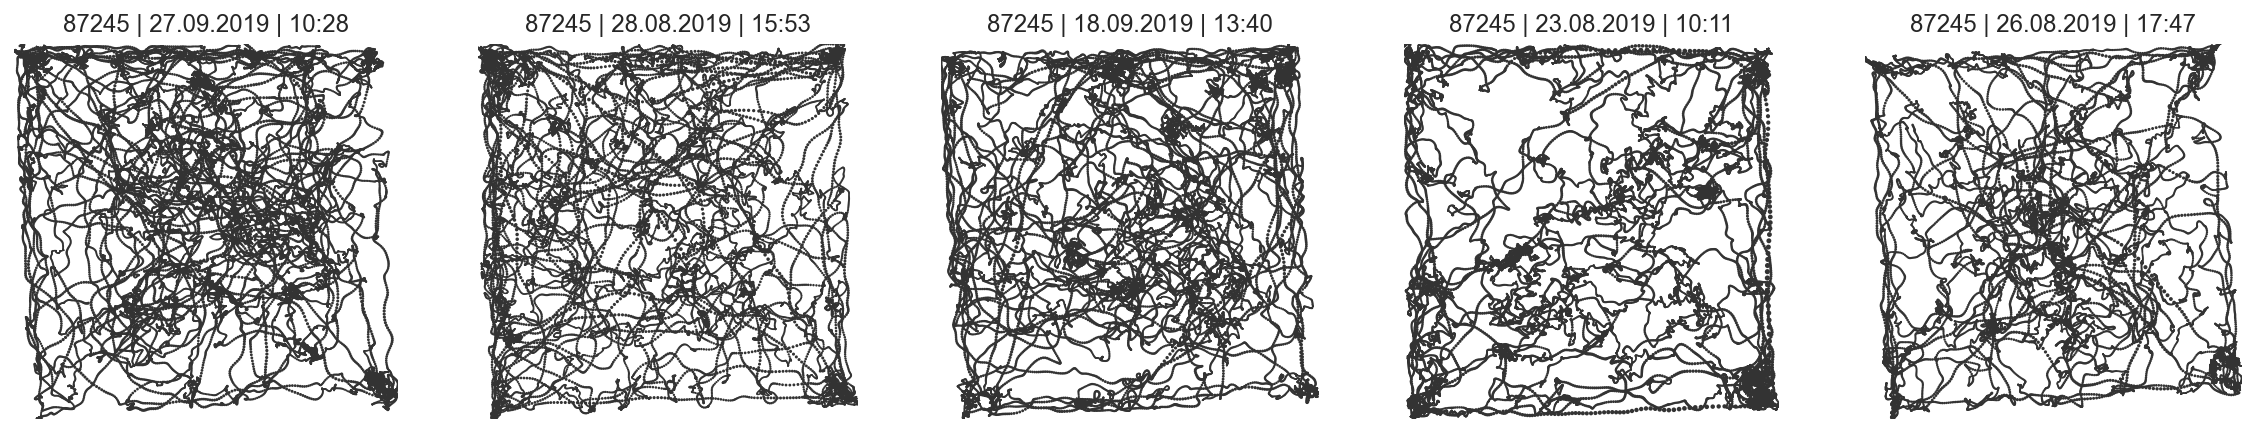

In [76]:
plot = dj_plotter(some_paths, total=10)
plot.tracking(draw_speed=True, draw_angle=False)

### Ratemaps

In [77]:
cell_param_dict = FilteredCellsParams.fetch1('parameter_dict_cell')

In [80]:
# GridScore * CutoffsGridscore
some_tuningmaps = Recording * Ratemap * Ratemap.Stats * CutoffsInfoContent * SNR\
                & 'animal_name = "87245"' \
                & 'information_content > info_content_95' \
                & 'snr_df_f > 4'\
                & cell_param_dict
print(len(some_tuningmaps))

409


In [81]:
keys = some_tuningmaps.proj('information_content').fetch(as_dict=True, order_by='information_content DESC')
print(len(keys))

409


Drawing tuningmaps:   0%|          | 0/19 [00:00<?, ?it/s]

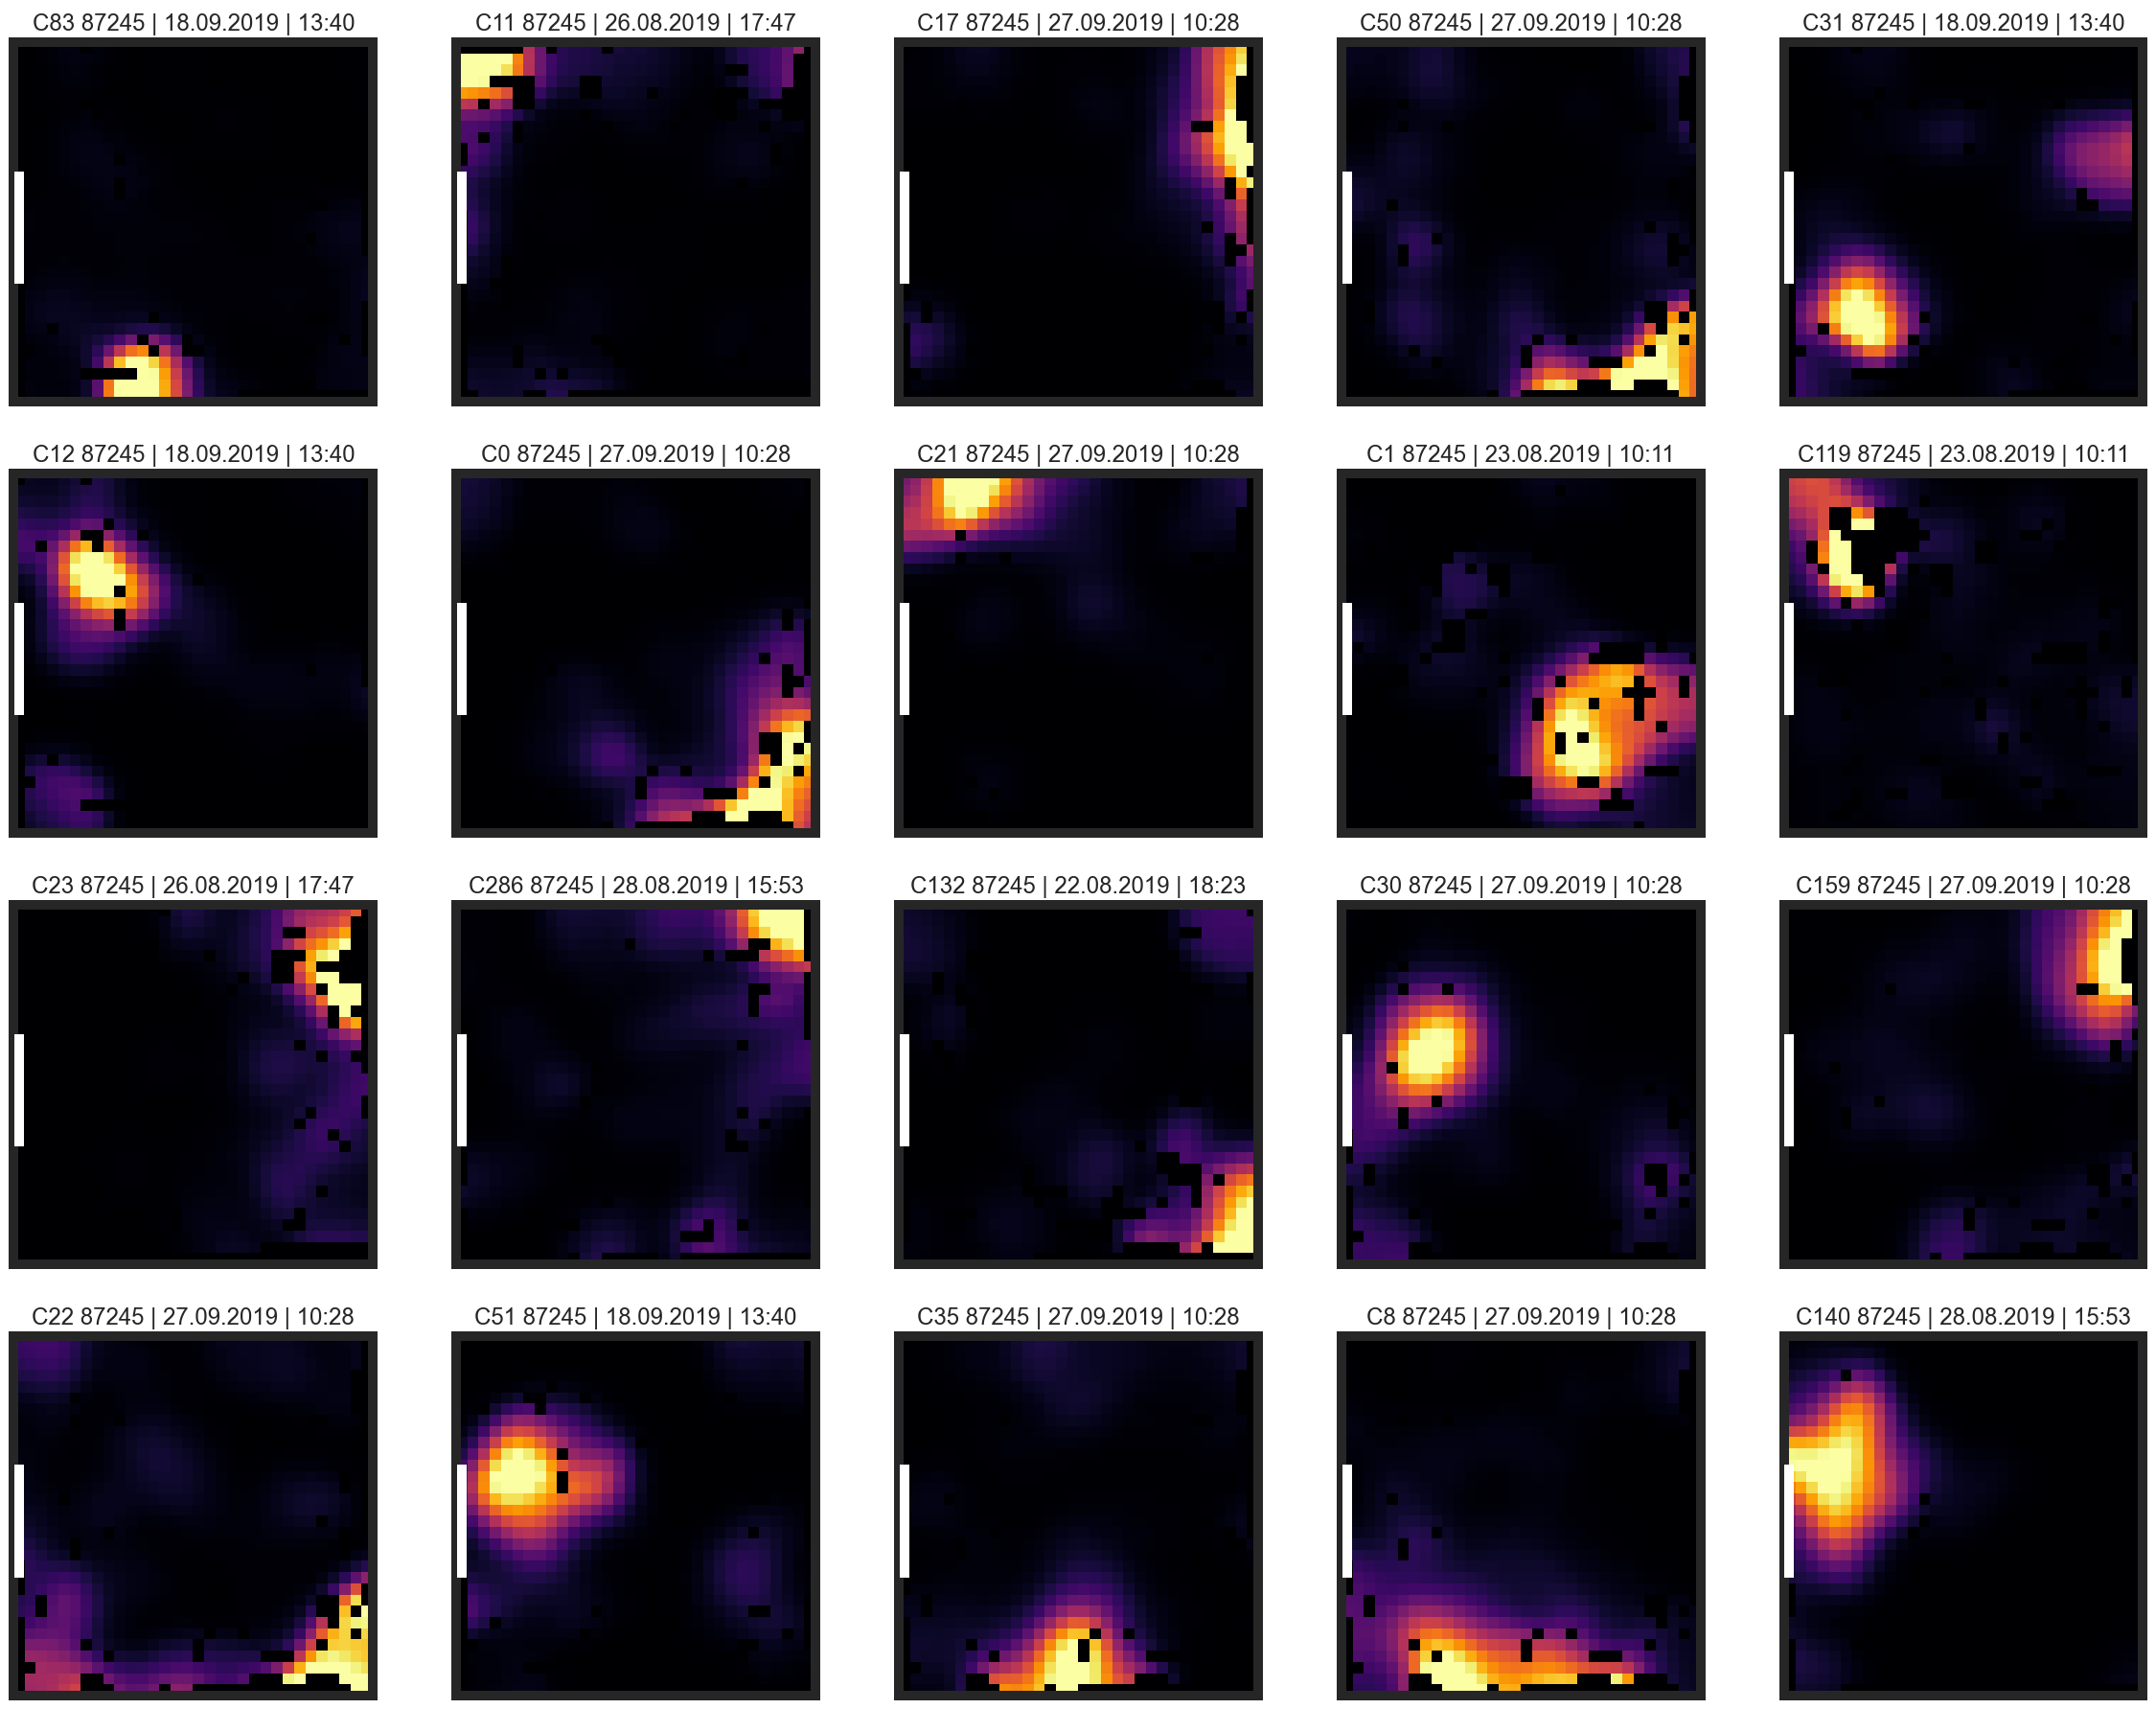

In [82]:
plot = dj_plotter(some_tuningmaps, keys, total=20)
plot.tuningmaps(hash_or_animal='animal', cue_card_pos='west', cmap='inferno')

In [148]:
plot

DJ plotter class
Available attributes:
['recording_name', 'recording_order', 'recording_name', 'signal_dataset', 'cell_id', 'channel', 'event_filter_id', 'tracking_dataset', 'trackingparams_id', 's_t_params_id', 'signal_type', 'map_params_id', 'field_params_id', 'grid_params_id', 'shuffle_params_id', 'ang_params_id', 'border_params_id', 'dataset_name', 'noise_calc_id', 'animal_id', 'datasource_id', 'animal_name', 'timestamp', 'combined', 'timeseries_name', 'experiment_type', 'username', 'tuningmap', 'tuningmap_raw', 'mask_tm', 'binned_raw', 'bin_max', 'max', 'no_fields', 'fields_map', 'gridscore', 'acorr', 'gridscore_99', 'gridscore_95', 'gridscore_shuffles', 'snr_df_f', 'snr_f_corr', 'noise_indices', 'noise_df_f', 'noise_f_corr', 'noise_std', 'noise_std_half1', 'noise_std_half2', 'noise_med_half1', 'noise_med_half2', 'noise_ratio', 'noise_slope', 't_value', 'p_value', 'entry_time']